In [1]:
from scipy.stats import shapiro, spearmanr, ttest_ind, chi2_contingency
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
# Creating the object of wine dataset

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


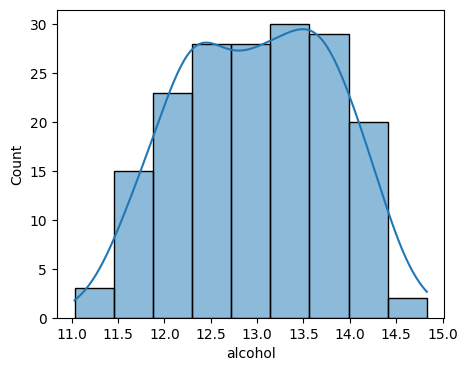

In [8]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["alcohol"], kde=True)
plt.show()

In [9]:
stats, p_val = shapiro(df["alcohol"])

print("Statistical Value %.5f%%"%stats)
print("p_value %.5f%%"%p_val)

alpha = 0.05

if p_val>alpha:
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Statistical Value 0.98180%
p_value 0.02005%
Reject null hypothesis


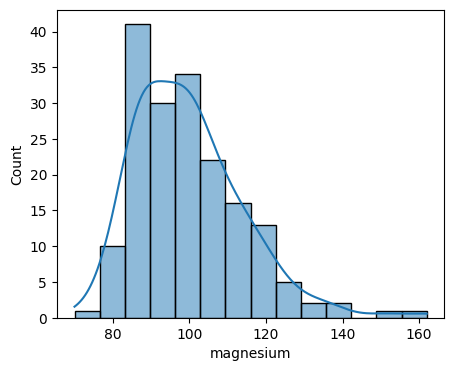

In [10]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["magnesium"], kde=True)
plt.show()

In [11]:
normal_data = np.random.normal(size = 1000)

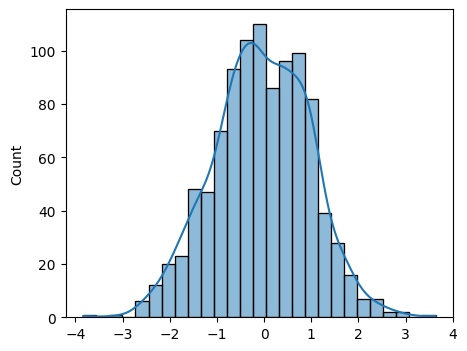

In [12]:
plt.figure(figsize=(5,4))
sns.histplot(x=normal_data, kde=True)
plt.show()

In [13]:
# H0 -> Data is normally distributed
# H1 -> Data is not normally distributed

stats, p_val = shapiro(normal_data)

print("Statistical Value %.5f%%"%stats)
print("p_value %.5f%%"%p_val)

alpha = 0.05

if p_val>alpha:
    print("Accept null hypothesis")
else:
    print("Reject null hypothesis")

Statistical Value 0.99791%
p_value 0.24592%
Accept null hypothesis


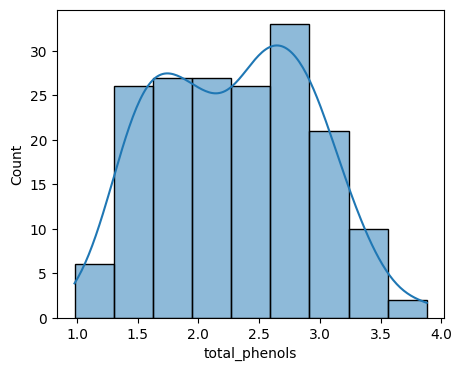

In [14]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["total_phenols"], kde=True)
plt.show()

In [15]:
# H0 -> Data is normally distributed
# H1 -> Data is not normally distributed

stats, p_val = shapiro(df["total_phenols"])

print("Statistical Value %.5f%%"%stats)
print("p_value %.5f%%"%p_val)

alpha = 0.05

if p_val>alpha:
    print("Accept null hypothesis")
else:
    print("Accept alternet hypothesis")

Statistical Value 0.97668%
p_value 0.00439%
Accept alternet hypothesis


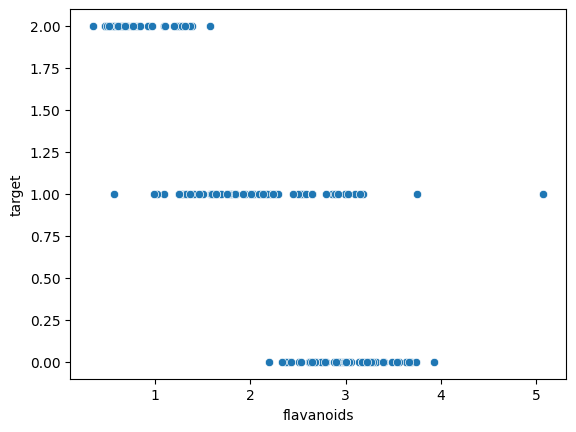

In [16]:
sns.scatterplot(x=df["flavanoids"], y=df["target"])
plt.show()

In [17]:
# H0 -> There is significant relation in flavonoid and target column
# H1 -> There is no significant relation in flavonoid and target column

stats, p_val = spearmanr(df["flavanoids"], df["target"])

print("Statistical Value %.5f%%"%stats)
print("p_value %.5f%%"%p_val)

alpha = 0.05

if p_val>alpha:
    print("Accept null hypothesis")
else:
    print("Accept alternet hypothesis")

Statistical Value -0.85491%
p_value 0.00000%
Accept alternet hypothesis


In [18]:
# H0 -> There is significant relation 
# H1 -> There is no significant relation
a = [1,2,3,4,5]
b = [5,4,3,2,1]
stats, p_val = spearmanr(a,b)

print("Statistical Value %.5f%%"%stats)
print("p_value %.5f%%"%p_val)

alpha = 0.05

if p_val>alpha:
    print("Accept null hypothesis")
else:
    print("Accept alternet hypothesis")

Statistical Value -1.00000%
p_value 0.00000%
Accept alternet hypothesis


In [19]:
# if the p value is greater than the chosen alpha level, 
# then the null hypothesis (that the data came from a normally 
# distributed population) can not be rejected

# if the p value is less than the chosen alpha level, 
# then the null hypothesis is rejected

In [20]:
data = make_classification( n_samples=1000, n_features=5, n_classes=2)

In [21]:
# n_sample -> No. of rows
# n_features -> No. of columns
# n_classes -> No. of classes in target column

In [22]:
type(data)

tuple

In [23]:
df = pd.DataFrame(data[0], columns=[f"Col_{i+1}" for i in range(5)])
df.head()

,Col_1,Col_2,Col_3,Col_4,Col_5
0,1.813705,1.030522,-0.043032,-1.839378,-1.359787
1,-2.076376,-1.188640,0.448513,1.573048,1.670741
2,-0.525884,-0.364466,1.194445,-0.971194,0.783393
3,-0.952414,1.180346,-1.892732,0.428395,-2.030332
4,-0.447682,-0.125806,-1.071759,1.705712,-0.110254


In [24]:
data[0][:5]

array([[ 1.81370474,  1.03052157, -0.04303241, -1.83937768, -1.35978746],
       [-2.07637632, -1.18864038,  0.44851253,  1.573048  ,  1.67074083],
       [-0.52588425, -0.36446591,  1.19444459, -0.97119366,  0.78339311],
       [-0.95241427,  1.18034606, -1.89273193,  0.42839463, -2.0303324 ],
       [-0.44768246, -0.12580628, -1.07175902,  1.70571223, -0.11025423]])

In [25]:
df["target"] = data[1]

In [26]:
df.head()

,Col_1,Col_2,Col_3,Col_4,Col_5,target
0,1.813705,1.030522,-0.043032,-1.839378,-1.359787,0
1,-2.076376,-1.188640,0.448513,1.573048,1.670741,1
2,-0.525884,-0.364466,1.194445,-0.971194,0.783393,0
3,-0.952414,1.180346,-1.892732,0.428395,-2.030332,1
4,-0.447682,-0.125806,-1.071759,1.705712,-0.110254,1


In [27]:
# H0 -> Col1 and Col2 are not correlated
# Ha -> Col1 and Col2 are correlated

stats, p_val = ttest_ind(df["Col_4"], df["Col_5"])

alpha = 0.05

if p_val>alpha:
    print("Accept the null hypothesis")
else:
    print("Reject the null hypothesis")

Accept the null hypothesis


In [28]:
# range(1,100) - Numerical / Sequential / Regression / Continue
# cat["M", "F"] - Categorical / Classified / Descrete
# dice[1, 2, 3, 4, 5, 6] - Categorical

In [29]:
net = pd.read_csv("Netflix Userbase.csv")
net.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [30]:
new_net = net[["Subscription Type","Gender"]]

In [31]:
new_net

,Subscription Type,Gender
0,Basic,Male
1,Premium,Female
2,Standard,Male
3,Standard,Female
4,Basic,Male
...,...,...
2495,Premium,Female
2496,Basic,Female
2497,Standard,Male
2498,Standard,Female


In [32]:
pd.pivot_table(new_net, columns="Subscription Type", index="Gender", aggfunc="sum")

Gender
Female
Male
